# We want to solve the following problem:
#$$
-u'' + x^2u=\lambda u\\
\textrm{BC: } u(\pm \infty) = 0
$$
#Write down the corresponding eigenvalue problem and solve it numerically.


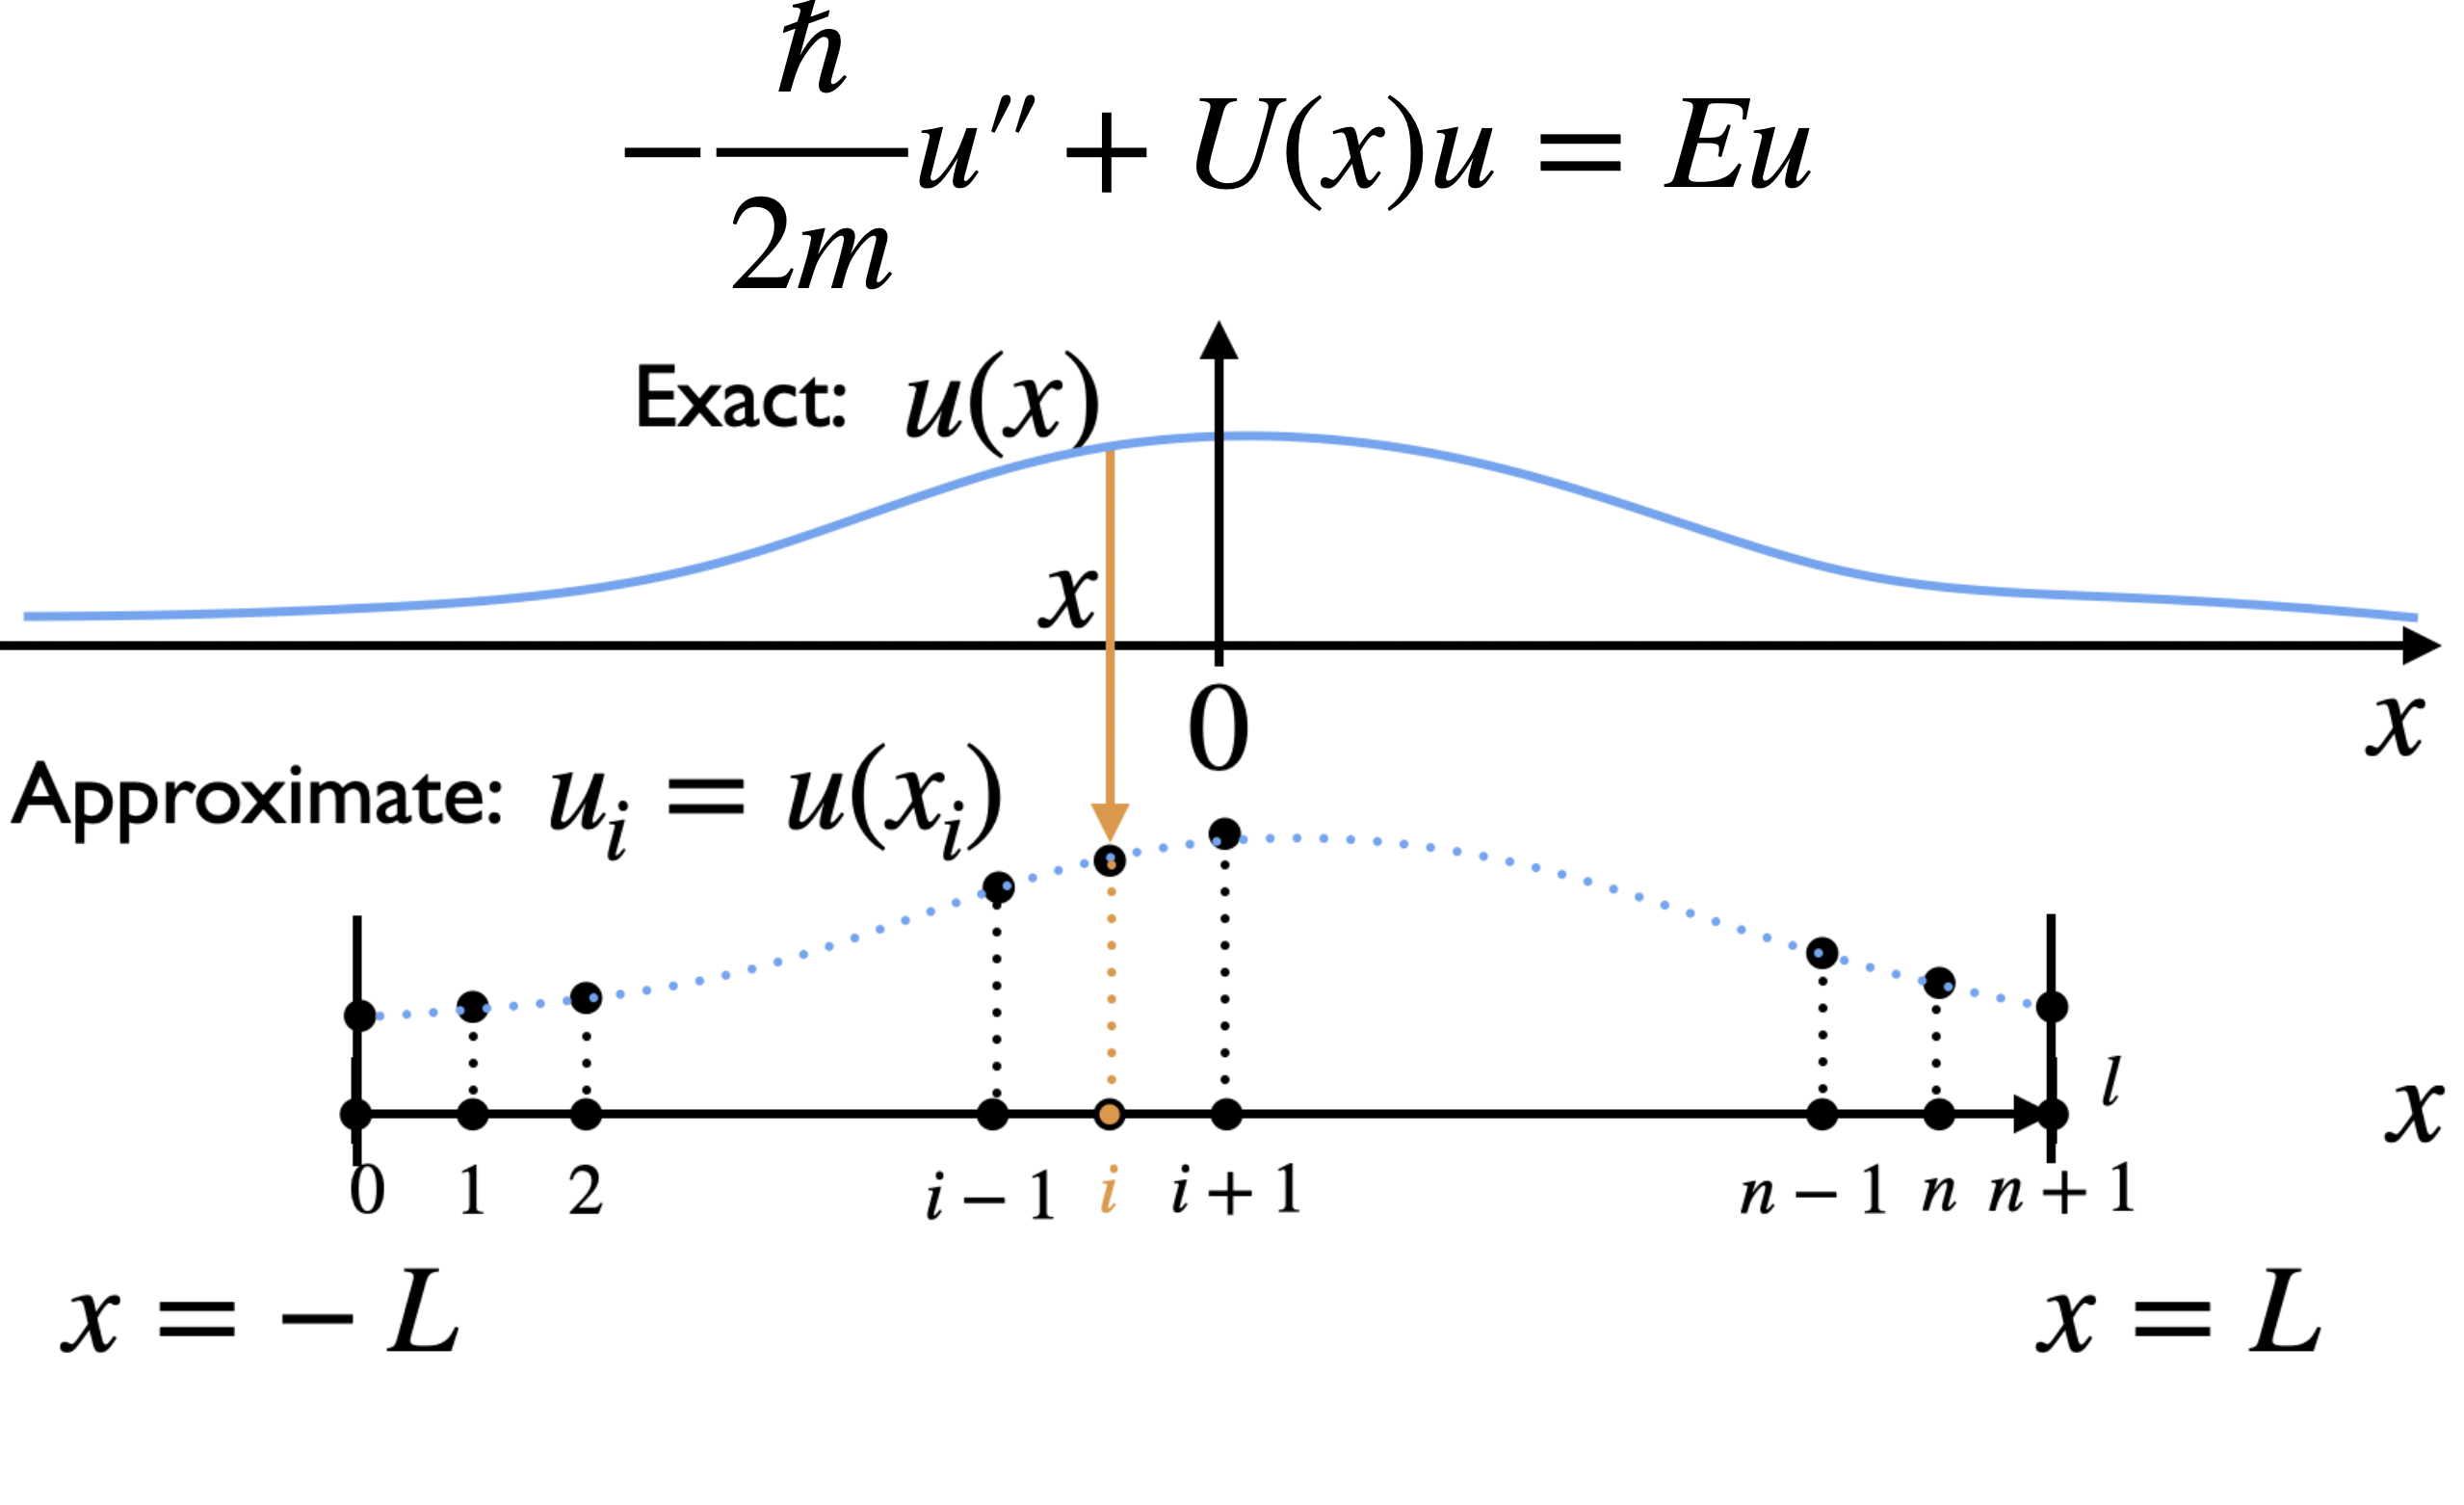

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'lines.markersize':15, 'lines.linewidth':3})

In [2]:
# Discretization
# Define computational domain L and grid x_0, ..., x_n with the step h
L = 10;         # the x-domain is [-L, L] with large enough L to represent infinity 
n = 500;        # the number of grid points on the domain
x = np.linspace(-L, L, n) # the grid
h = x[1]-x[0]   # step size in x to approximate derivatives: 
                # u'' = (u(i+1)-2*u(i)+u(i-1))/h^2

In [3]:
# Approximation
# Write the system for eigenvalue problem
Kn = 2*np.eye(n)-np.eye(n,k=-1)-np.eye(n,k=1) # second-derivative matrix
A = 1./h**2*Kn + np.diag(x**2) # full matrix

In [4]:
# Linear algebra
# Solve the eigenvalue problem and sort e-values and e-vectors in ascending order

e_vals, e_vecs = LA.eig(A);                             
order = np.argsort(e_vals)
e_vals, e_vecs = e_vals[order], e_vecs[:, order]

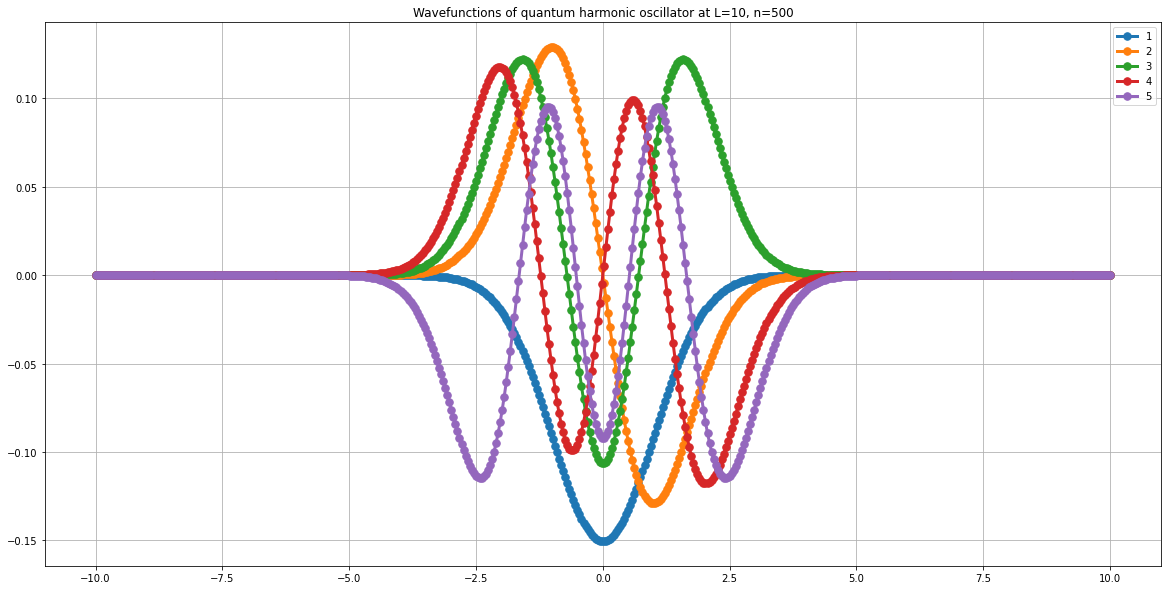

In [5]:
# Choose which eigenvectors to plot
nn = [0, 1, 2, 3, 4]; 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,e_vecs[:,nn],'.-');
ax.grid()
ax.legend(list(map(lambda x: f'{x+1}', nn)) );
ax.set_title(f'Wavefunctions of quantum harmonic oscillator at L={L}, n={n}');

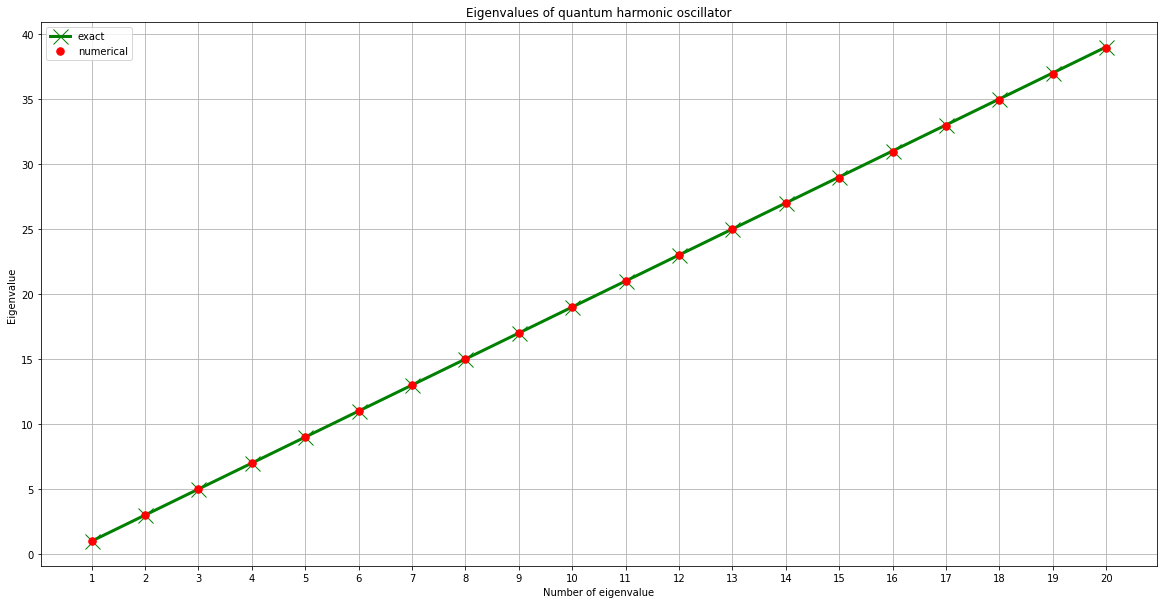

In [6]:
# Comparison with the theory
# Write the exact eigenvalues and choose which to plot
e_exact = 2*np.arange(n+1) + 1;           
e_end = min(20,n);                        

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.arange(1,e_end+1),e_exact[:e_end],'gx-')
ax.plot(np.arange(1,e_end+1),e_vals[:e_end],'r.')
ax.grid()
ax.set_xticks(np.arange(1,e_end+1))
ax.legend(['exact','numerical']); 
ax.set_title('Eigenvalues of quantum harmonic oscillator');
ax.set_xlabel('Number of eigenvalue')
ax.set_ylabel('Eigenvalue');

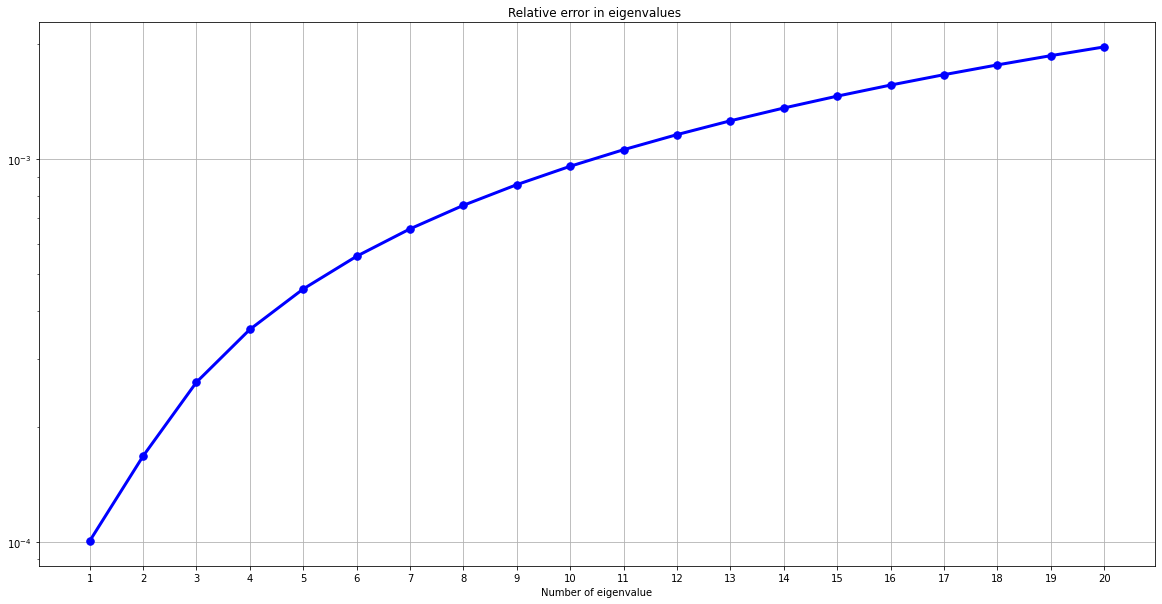

In [7]:
# Plot the relative error. USE SEMILOG AXES
err = (e_exact[:e_end] - e_vals[:e_end])/e_exact[:e_end];

fig, ax = plt.subplots(figsize=(20,10))
ax.semilogy(np.arange(1,e_end+1),abs(err),'b.-')
ax.grid()
ax.set_title('Relative error in eigenvalues ')
ax.set_xticks(np.arange(1,e_end+1))
ax.set_xlabel('Number of eigenvalue');